In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Dataset/Osteoarthritis_Assignment_dataset-20230409T085901Z-001.zip

In [ ]:
import cv2
import os
data_path='/content/Osteoarthritis_Assignment_dataset/train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Normal': 0, 'Osteoarthritis': 1}
['Normal', 'Osteoarthritis']
[0, 1]


In [ ]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

In [ ]:
train_path = '/content/Osteoarthritis_Assignment_dataset/train'
test_path = '/content/Osteoarthritis_Assignment_dataset/test'
valid_path = '/content/Osteoarthritis_Assignment_dataset/Valid'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# dataset_size*epoch = number_of_iteration*batch_size

batchSize = 30

train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_batches = train_gen.flow_from_directory(directory=train_path, target_size=(256,256), classes=['Normal', 'Osteoarthritis'], seed=2)
valid_batches = train_gen.flow_from_directory(directory=valid_path, target_size=(256,256), classes=['Normal', 'Osteoarthritis'], seed=2)
test_batches = test_gen.flow_from_directory(directory=test_path, target_size=(256,256), classes=['Normal', 'Osteoarthritis'], seed=2, shuffle=False)

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.
Found 845 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

In [ ]:
def plotImages(images_arr, batchSize, subplot_dim=[1,10]):
    fig, axes = plt.subplots(subplot_dim[0], subplot_dim[1], figsize=(20,20))
    axes = axes.flatten()  # flaten converts an array to a 1D vector
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(train_batches[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

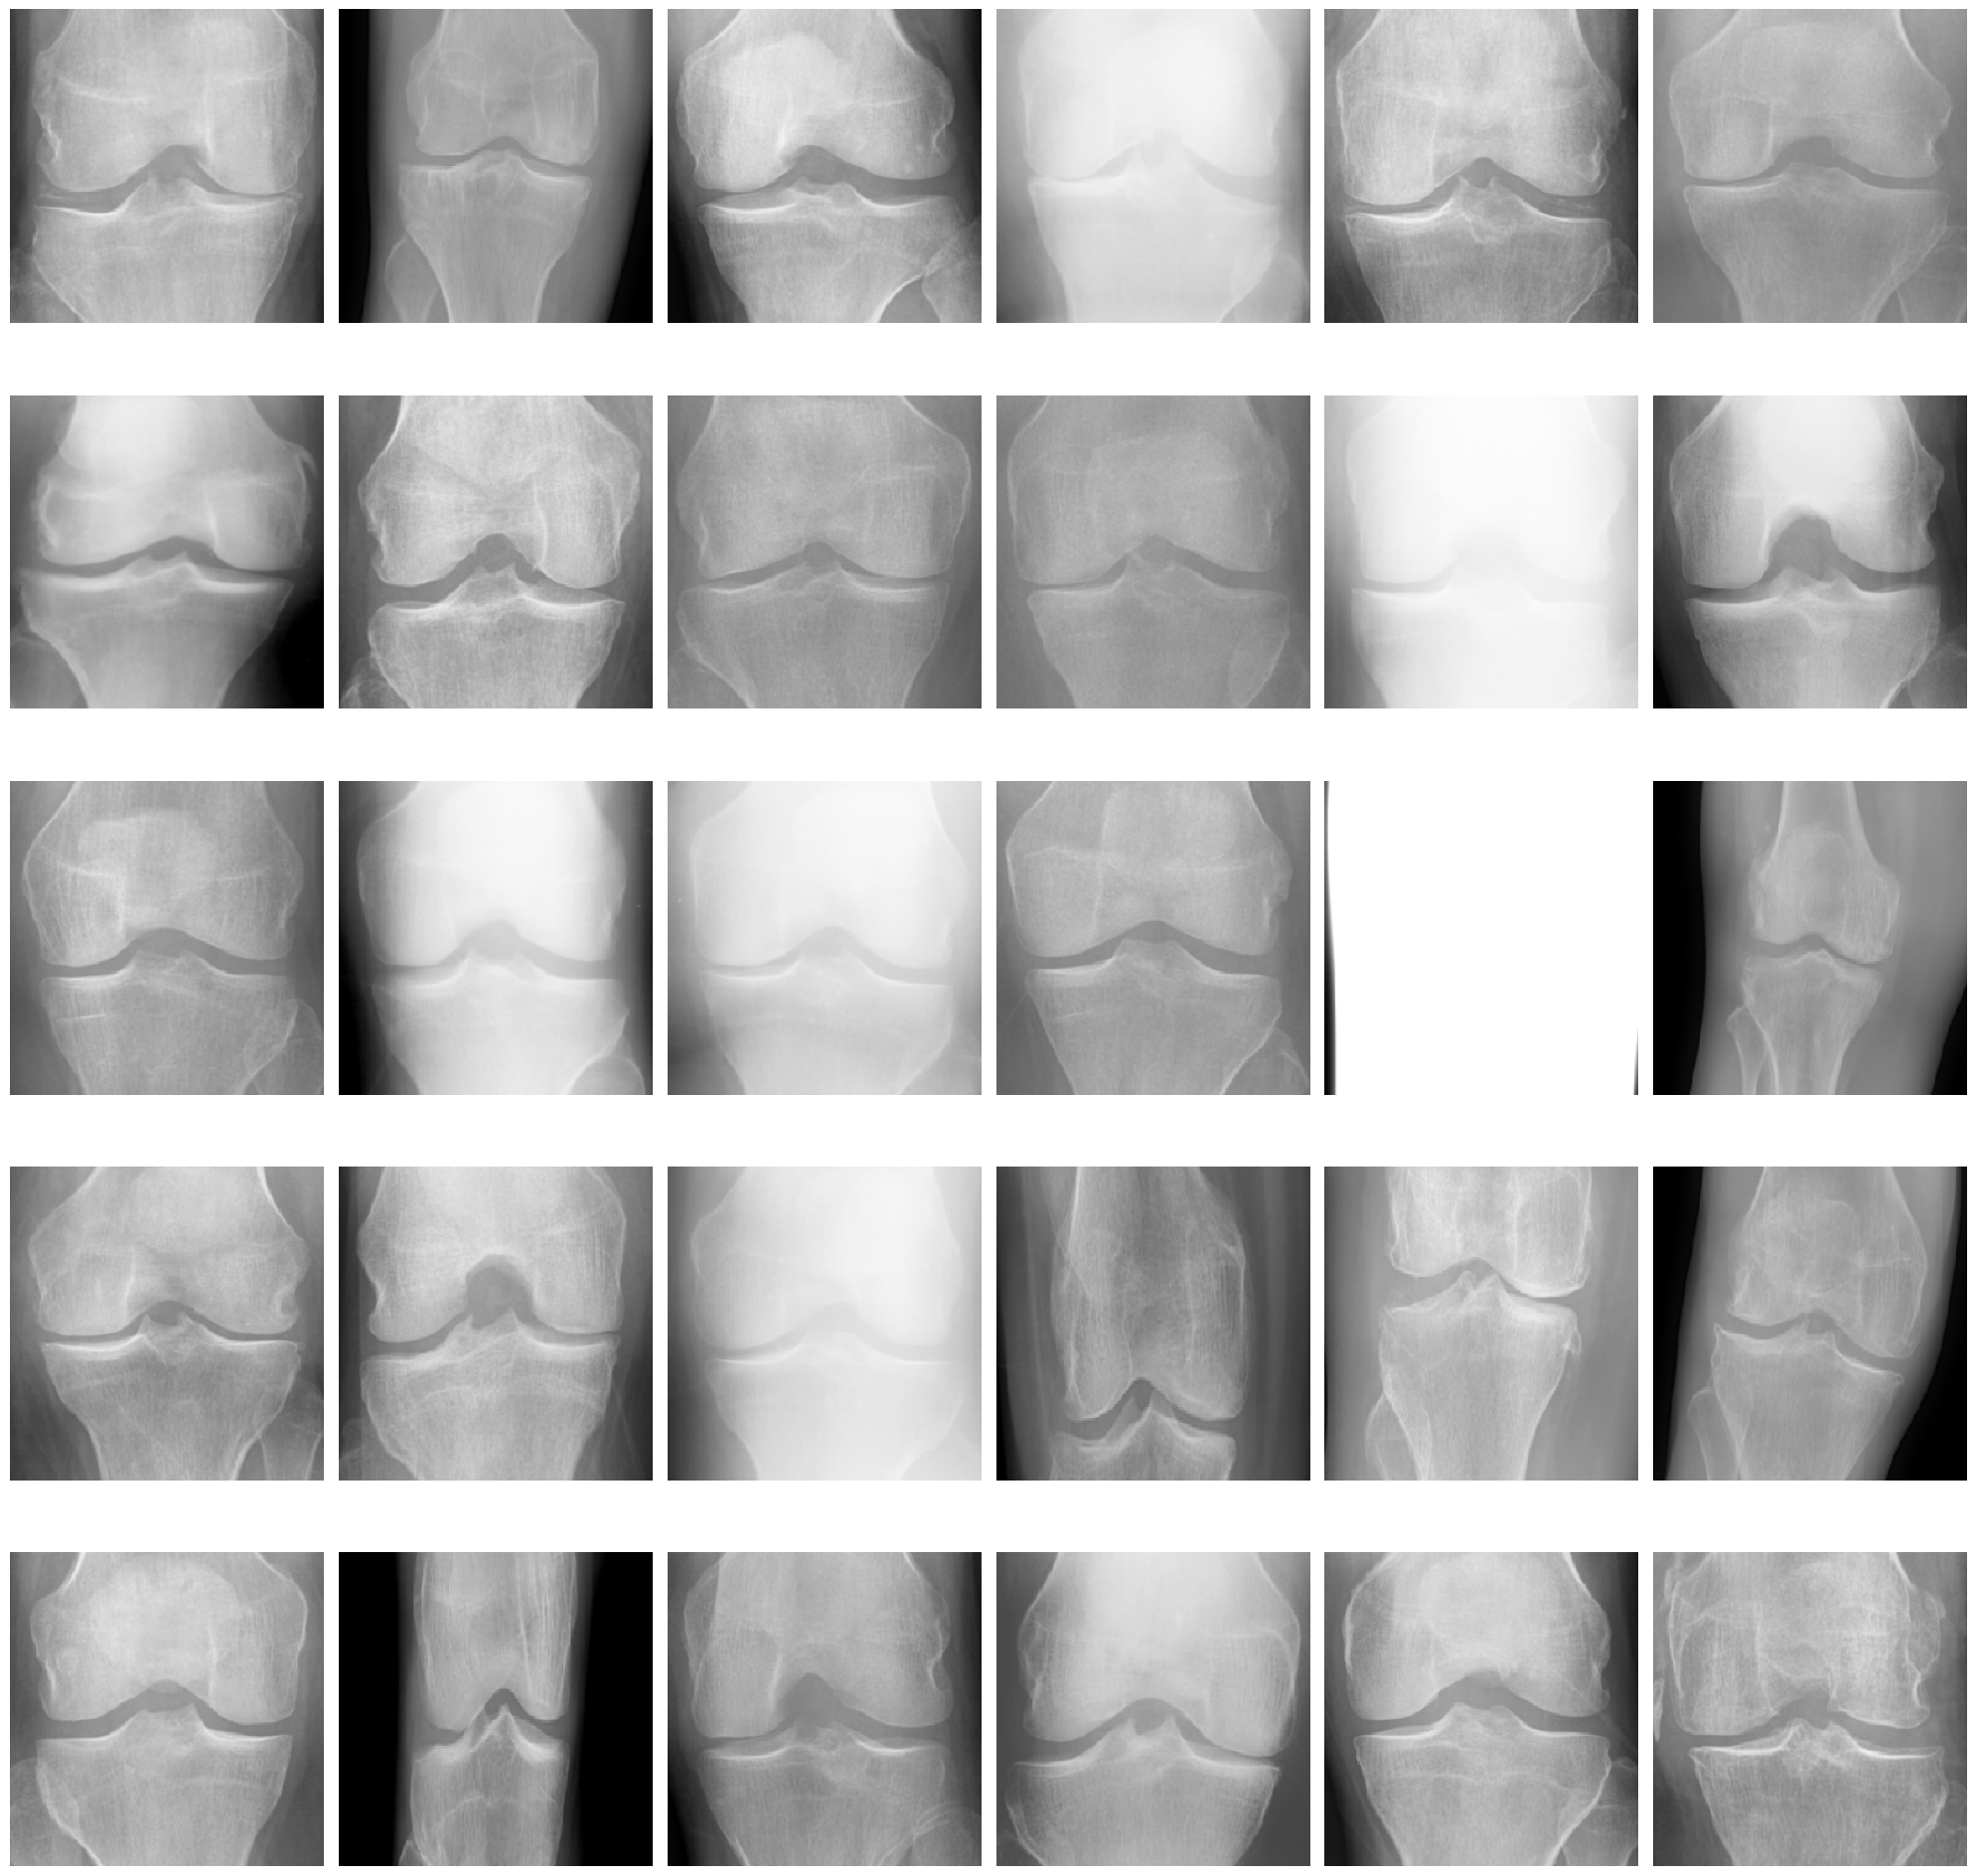

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
# taking (train) images and labels of only one batch (32 images,32 labels) and plot them

imgs, labels = next(train_batches)
plotImages(imgs, batchSize, [5,6])
print(labels)

In [ ]:
history = model.fit(train_batches, 
                    validation_data=valid_batches, 
                    epochs=100, 
                    shuffle=True)


Epoch 1/100
74/74 [==============================] - 37s 339ms/step - loss: 0.6124 - accuracy: 0.6447 - val_loss: 0.5921 - val_accuracy: 0.6739
Epoch 2/100
74/74 [==============================] - 21s 283ms/step - loss: 0.5759 - accuracy: 0.6587 - val_loss: 0.5702 - val_accuracy: 0.6693
Epoch 3/100
74/74 [==============================] - 21s 279ms/step - loss: 0.5630 - accuracy: 0.6570 - val_loss: 0.7220 - val_accuracy: 0.6724
Epoch 4/100
74/74 [==============================] - 20s 274ms/step - loss: 0.5619 - accuracy: 0.6536 - val_loss: 0.5615 - val_accuracy: 0.6677
Epoch 5/100
74/74 [==============================] - 21s 281ms/step - loss: 0.5549 - accuracy: 0.6626 - val_loss: 0.5631 - val_accuracy: 0.6661
Epoch 6/100
74/74 [==============================] - 21s 280ms/step - loss: 0.5520 - accuracy: 0.6677 - val_loss: 0.5691 - val_accuracy: 0.6708
Epoch 7/100
74/74 [==============================] - 20s 274ms/step - loss: 0.5470 - accuracy: 0.6681 - val_loss: 0.5556 - val_accuracy:

In [ ]:
model.save('model.h5')

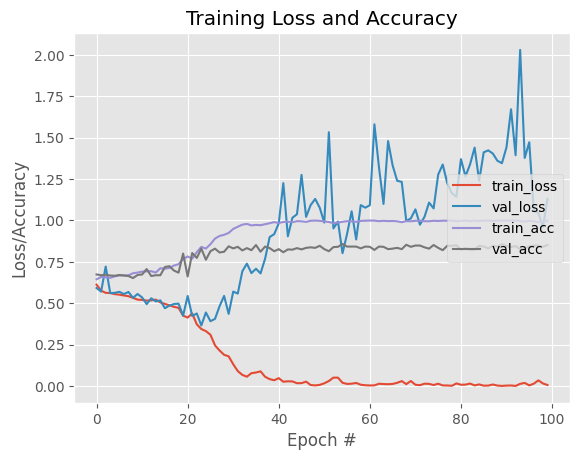

In [ ]:
from matplotlib import pyplot as plt
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [ ]:
# test model
#epoch = 2
predictions = model.predict(x = test_batches, verbose=1)

27/27 [==============================] - 3s 120ms/step


In [ ]:
# evaluate test results
results = model.evaluate(x = test_batches, verbose=1)

27/27 [==============================] - 3s 113ms/step - loss: 58.6897 - accuracy: 0.3479


In [ ]:
test_labels = test_batches.classes
print(test_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
# confusion matrix plot function
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix_custom(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """ prints and plots confusion matrix. 
        normalization can be applied by setting `normalize=True` """

    plt.figure(figsize=(12,8))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization ')
    
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.2f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion.jpg', dpi=400, pad_inches=0.1)

Confusion matrix, without normalization 
[[ 27 542]
 [  9 267]]


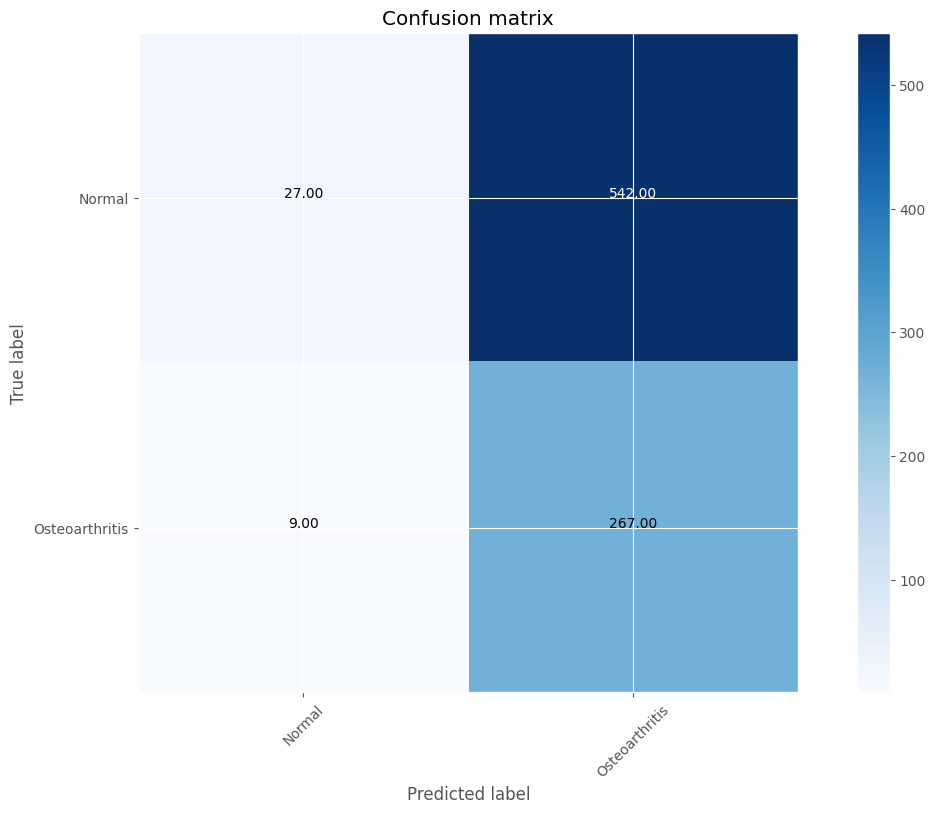

In [ ]:
# confusion matrix output
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)
cm_plot_lables = ['Normal', 'Osteoarthritis' ]
# non normalized confusion matrix
#plot_confusion_matrix_custom(cm = cm, classes = cm_plot_lables)

# normalized confusion matrix
plot_confusion_matrix_custom(cm = cm, classes = cm_plot_lables, normalize = False)

In [ ]:
# classification report
from sklearn.metrics import classification_report

classification_report_result = classification_report(test_labels, rounded_predictions, target_names=cm_plot_lables)
print(classification_report_result)

                precision    recall  f1-score   support

        Normal       0.75      0.05      0.09       569
Osteoarthritis       0.33      0.97      0.49       276

      accuracy                           0.35       845
     macro avg       0.54      0.51      0.29       845
  weighted avg       0.61      0.35      0.22       845



In [ ]:
vaL_loss, val_accuracy= model.evaluate(x = test_batches, verbose=1)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

27/27 [==============================] - 4s 145ms/step - loss: 58.6897 - accuracy: 0.3479
test loss: 58.68970489501953 %
test accuracy: 0.3479290008544922 %
